In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("/home/cassio/Downloads/2-Cap15/dataset.csv")

In [3]:
df.shape

(500, 2)

In [4]:
df.columns

Index(['horas_estudo_mes', 'salario'], dtype='object')

In [5]:
df.head()

,horas_estudo_mes,salario
0,57.0,6813.0
1,48.0,6855.0
2,60.0,5801.0
3,73.0,7431.0
4,46.0,5475.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   horas_estudo_mes  500 non-null    float64
 1   salario           500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


## Análise Exploratória - Resumo Estatístico

In [7]:
df.isnull().sum()

horas_estudo_mes    0
salario             0
dtype: int64

In [8]:
df.corr()

,horas_estudo_mes,salario
horas_estudo_mes,1.000000,0.818576
salario,0.818576,1.000000


In [9]:
df.describe()

,horas_estudo_mes,salario
count,500.000000,500.000000
mean,50.060000,6018.930000
std,14.659406,848.697853
min,1.000000,3664.000000
25%,39.750000,5473.000000
50%,50.000000,6013.500000
75%,60.000000,6542.000000
max,100.000000,9348.000000


In [10]:
df['horas_estudo_mes'].describe()

count    500.000000
mean      50.060000
std       14.659406
min        1.000000
25%       39.750000
50%       50.000000
75%       60.000000
max      100.000000
Name: horas_estudo_mes, dtype: float64

<Axes: xlabel='horas_estudo_mes', ylabel='Count'>

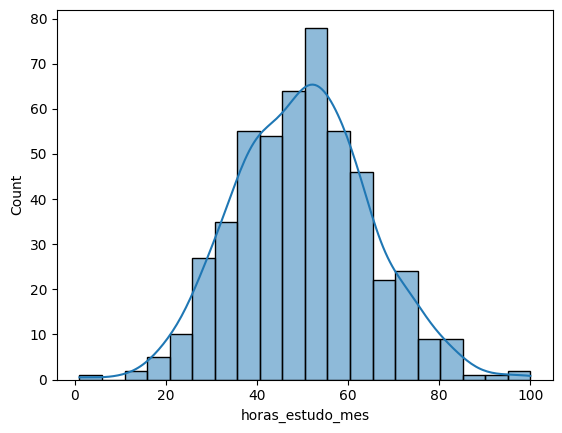

In [11]:
# Histograma da variável preditora
sns.histplot(data= df, x= 'horas_estudo_mes', kde= True)

## Preparação dos Dados

In [12]:
# Prepara a variável de entrada X
X = np.array(df['horas_estudo_mes'])

In [13]:
type(X)

numpy.ndarray

In [14]:
# Ajusta o shape de X
X = X.reshape(-1,1)

In [15]:
# Prepara a variável alvo
y = df['salario']

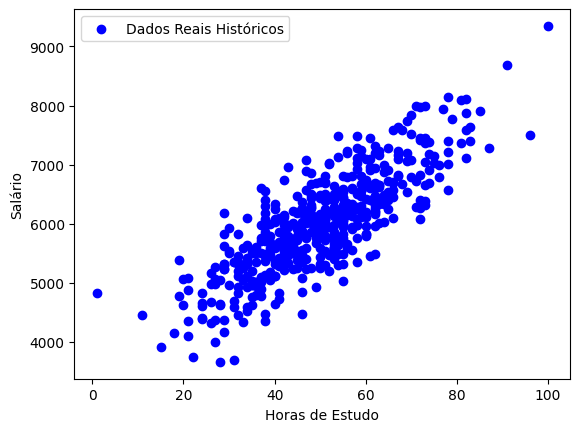

In [16]:
# Gráfico de dispersão entre X e y
plt.scatter(X, y, color = "blue", label = "Dados Reais Históricos")
plt.xlabel("Horas de Estudo")
plt.ylabel("Salário")
plt.legend()
plt.show()

In [17]:
# Dividir dados em treinamento e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state= 42)

In [18]:
X_treino.shape

(400, 1)

In [19]:
X_teste.shape

(100, 1)

In [20]:
y_treino.shape

(400,)

In [21]:
y_teste.shape

(100,)

## Modelagem Preditiva (Machine Learning)

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [22]:
modelo = LinearRegression()

In [23]:
modelo.fit(X_treino, y_treino)

LinearRegression()

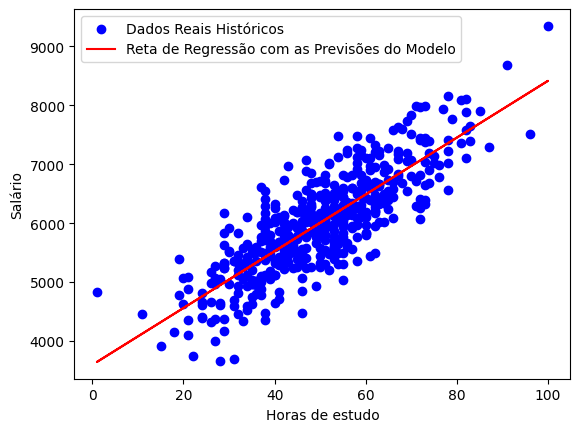

In [27]:
# Visualiza a reta de regressão linear (previsões) e os dados reais usados no treinamento
plt.scatter(X, y, color= "blue", label= "Dados Reais Históricos")
plt.plot(X, modelo.predict(X), color = "red", label = "Reta de Regressão com as Previsões do Modelo")
plt.xlabel("Horas de estudo")
plt.ylabel("Salário")
plt.legend()
plt.show()

In [29]:
# Avalia o modelo nos dados de teste
score = modelo.score(X_teste, y_teste)
print(f"O coeficiente de R² é {score:.2f}")

O coeficiente de R² é 0.59


In [30]:
# Intercepto - parâmetro w0
modelo.intercept_

3596.7837243727545

In [31]:
# Slope - parâmetro w1
modelo.coef_

array([48.18185277])

## Deploy do Modelo

Usaremos o modelo para prever o salário com base nas horas de estudo.

In [32]:
# Define um novo valor para horas de estudo
horas_estudo_novo = np.array([[48]]) 

# Faz previsão com o modelo treinado
salario_previsto = modelo.predict(horas_estudo_novo)

print(f"Se você estudar cerca de", horas_estudo_novo, "horas por mês seu salário pode ser igual a", salario_previsto)

Se você estudar cerca de [[48]] horas por mês seu salário pode ser igual a [5909.5126574]


In [33]:
# Mesmo resultado anterior usando os parâmetros (coeficientes) aprendidos pelo modelo
# y_novo = w0 + w1 * X
salario = modelo.intercept_ + (modelo.coef_ * horas_estudo_novo)
print(salario)

[[5909.5126574]]
